# Best Neighborhood in Pittsburgh - Crime Analysis

![Pittsburgh](images/pittsburgh.jpg)

### Introduction
For this project, I chose to define the "best" neighborhood as the **safest neighborhood** in Pittsburgh. Safety is a critical aspect of livability, as people often prefer to live in areas with lower crime rates. To measure safety, I am using the **Pittsburgh Police Incident Blotter** dataset from the Western Pennsylvania Regional Data Center (WPRDC). This dataset contains records of reported crimes throughout Pittsburgh.

![Spongebob GIF](images/bag-robbery.gif)

My analysis will involve counting crimes by neighborhood, cleaning the data to remove unknown or missing entries, and visualizing the results to determine which neighborhoods have the fewest reported crimes.

In [21]:
import pandas as pd

# insert csv data
df = pd.read_csv("kadair_walker/crime_data.csv")

# display data from cvs (defualt to first 10)
df.head(10)

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651
5,6,2802321,16000045.0,23,2016-01-01T00:24:00,"1300 Block E CARSON ST Pittsburgh, PA 15203",Y,South Side Flats,3,PUBLIC DRUNKENESS,5505 Public Drunkenness / 3503.B1I DEF. TRESPA...,1702.0,3.0,4.0,-79.985175,40.428607
6,7,2802313,16000031.0,4,2016-01-01T00:44:00,"1200 Block Lakewood ST Pittsburgh, PA 15220",Y,Elliott,6,AGG ASSAULT/OTHER/INJURY,2702 Aggravated Assault.,2020.0,2.0,5.0,-80.041147,40.447956
7,8,2802339,16000077.0,23,2016-01-01T00:45:00,"1500 Block E Carson ST Pittsburgh, PA 15203",Y,South Side Flats,3,PUBLIC DRUNKENESS,5505 Public Drunkenness / 5503(a)(1) DISORDERL...,1702.0,3.0,4.0,-79.983307,40.428685
8,9,2802343,16000083.0,10,2016-01-01T00:55:00,"1200 Block Nolan CT Pittsburgh, PA 15221",Y,Homewood North,5,HARRASSMENT/THREAT/ATTEMPT/PHY,"2709(a)(1) Harassment by Physical Contact, or ...",1301.0,9.0,2.0,-79.886893,40.459431
9,10,2801341,16000884.0,5,2016-01-01T01:00:00,"2400 Block Berg ST Pittsburgh, PA 15203",N,South Side Slopes,3,BURGLARY/FORCE ENT/RES,3502 Burglary.,1608.0,3.0,4.0,-79.972382,40.419609


In [22]:
# display the columns of the dataset
df.columns

Index(['_id', 'PK', 'CCR', 'HIERARCHY', 'INCIDENTTIME', 'INCIDENTLOCATION',
       'CLEAREDFLAG', 'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE',
       'INCIDENTHIERARCHYDESC', 'OFFENSES', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

In [23]:
# retrieve information from the "INCIDENTNEIGHBORHOOD" column
crime_counts = df["INCIDENTNEIGHBORHOOD"].value_counts()

# display 10 neighborhoods with most incidents reported
crime_counts.head(10)

INCIDENTNEIGHBORHOOD
South Side Flats             16761
Central Business District    15939
Carrick                      10361
Bloomfield                    7798
Shadyside                     7582
East Liberty                  7195
Squirrel Hill South           6718
Brookline                     6638
Mount Washington              6630
Homewood South                6481
Name: count, dtype: int64

In [24]:
# display 10 neighborhoods with least incidents reported
crime_counts.tail(10)

INCIDENTNEIGHBORHOOD
Swisshelm Park             389
East Carnegie              375
New Homestead              305
Outside State              299
Chartiers City             283
Ridgemont                  273
Troy Hill-Herrs Island     252
Outside County             209
Mt. Oliver Neighborhood    117
Mt. Oliver Boro             92
Name: count, dtype: int64

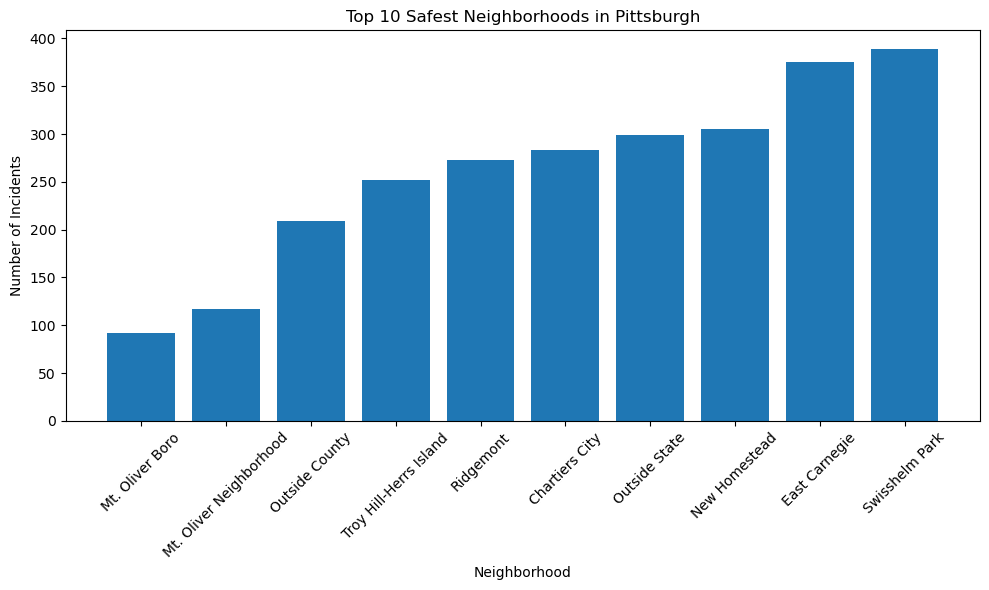

In [25]:
import matplotlib.pyplot as plt

# sorting crime_counts from least to greatest
safest = crime_counts.sort_values().head(10)

# plotting vertical bar graph
plt.figure(figsize=(10, 6))
plt.bar(safest.index, safest.values)

# titles and labels
plt.title("Top 10 Safest Neighborhoods in Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Incidents")

# rotating x-axis labels to make them readable
plt.xticks(rotation = 45)

# display
plt.tight_layout()
plt.show()

In [26]:
# remove or "clean" rows that do not display neighborhood name (NaN)
df_clean = df[df["INCIDENTNEIGHBORHOOD"].notna()]

# remove rows where the neighborhood is labeled as "Unknown"
df_clean = df_clean[df_clean["INCIDENTNEIGHBORHOOD"] != "Unknown"]

# counting number of incidents for each neighborhood
crime_counts = df_clean["INCIDENTNEIGHBORHOOD"].value_counts()

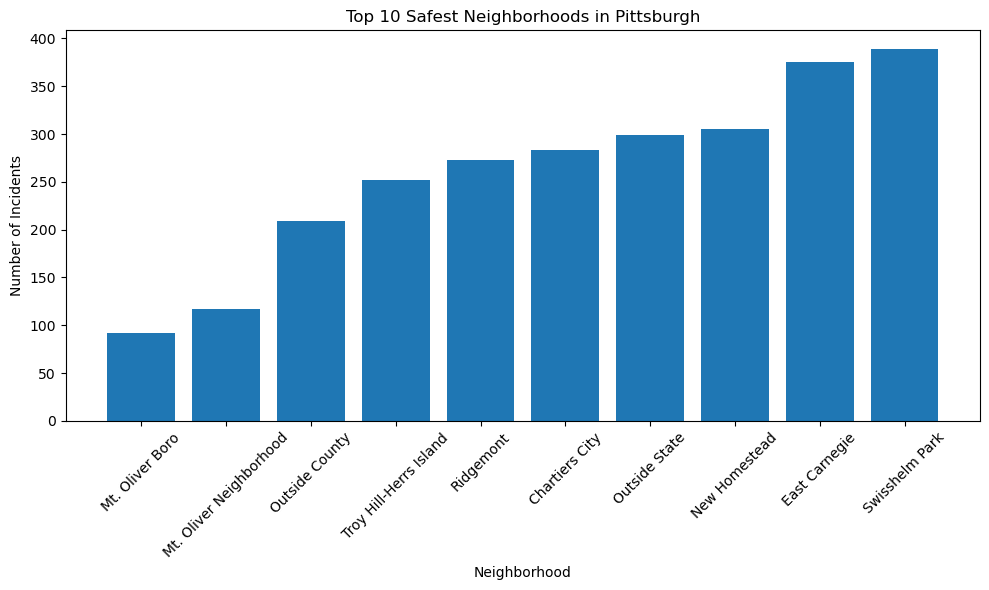

In [27]:
import matplotlib.pyplot as plt

# sorting crime_counts from least to greatest
safest = crime_counts.sort_values().head(10)

# plotting vertical bar graph
plt.figure(figsize=(10, 6))
plt.bar(safest.index, safest.values)

# titles and labels
plt.title("Top 10 Safest Neighborhoods in Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Incidents")

# rotating x-axis labels to make them readable
plt.xticks(rotation = 45)

# display
plt.tight_layout()
plt.show()

In [28]:
# creating a DataFrame from the 'safest' data
safest_df = pd.DataFrame({
    'Neighborhood': safest.index,
    'Number of Incidents': safest.values
})

# display
safest_df.reset_index(drop=True, inplace=True)
safest_df

,Neighborhood,Number of Incidents
0,Mt. Oliver Boro,92
1,Mt. Oliver Neighborhood,117
2,Outside County,209
3,Troy Hill-Herrs Island,252
4,Ridgemont,273
5,Chartiers City,283
6,Outside State,299
7,New Homestead,305
8,East Carnegie,375
9,Swisshelm Park,389


### Conclusion

Based on the Pittsburgh Police Incident Blotter dataset, the safesat neighborhood is **Mt. Oliver Boro** with only **92** reported crimes.

This analysis shows how data can provide objective insights into safety within Puiuttsburgh's neighborhoods. I chose safety as my metric because it is a fundamental factor when determining the livability of an area. A nieghborhood with lower crime rates is often more appealing to residents and visitors.

![Cozy Tom](images/tom.gif)

Interestingly, I was surprised to find that **Mt. Oliver Boro** was ranked as one of the safest neighborhoods because I assumed that areas with higher population density or heavy traffic, such as Downtown or Oakland, would have a higher number of reported crimes due to increaased activity and potential for incidents. The data, however, shows that less populated or lesser-known nieghborhoods may provide a higher degree of safety.

While this analysis provides useful insights, it could be improved by considering more factors such as the types of crimes reported, time of year, or comparison to population size. Additionally, using multiple datasets could provide a more comprehensive view of wahat makes a neighborhood "the best".